<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-Stratified-based-Geospatial-Online-Sampling/blob/time-profiling/code/2.geohash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
except ModuleNotFoundError:
    IN_COLAB = False
else:
    drive.mount('/content/drive')
    IN_COLAB = True

In [2]:
if IN_COLAB:
    TRIPS_PATH = "/content/drive/MyDrive/Project/"
else:
    TRIPS_PATH = "../data/"
TRIPS_PATH += "NYC_Pilot2_PM_Part1.csv"

if IN_COLAB:
    POLYGON_PATH = "/content/drive/MyDrive/Project/"
else:
    POLYGON_PATH = "../data/"
POLYGON_PATH += "nyc_polygon.geojson"

In [3]:
POLYGON_web_PATH = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson"
TRIPS_web_PATH = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv"


In [4]:
!pip install pygeohash



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import folium
import geopandas as gpd

import pygeohash as gh

In [6]:
sampling_fraction = 0.6
geohash_precision = 6

In [7]:
trips = pd.read_csv(TRIPS_web_PATH)

In [8]:
trips = \
trips[(trips['latitude'] != 0 ) & \
(trips['longitude']!=0 )]

In [9]:
# %%time
trips['geohash']=trips.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)

In [10]:
# %%time
# convert to Geopandas Geodataframe
gdf_trips = gpd.GeoDataFrame(trips, geometry=gpd.points_from_xy(trips.longitude, trips.latitude))

In [11]:
# The CRS for trips should remain geographic 4326
gdf_trips.set_crs('epsg:4326', inplace=True)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0       NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1       NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2       NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3       NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4       NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   
...             ...         ...        ...        ...   ...   ...   ...   ...   
169994  NYCP2_CS03A  1631457109  40.823353 -73.890488   115    11     2     0   
169995  NYCP2_CS03A  1631457114  40.823349 -73.890480   132     8     2     0   
169996  NYCP2_CS03A  1631457119  40.823349 -73.890480   147    14     0     0   
169997  NYCP2_CS03A  1631457124  40.823345 -73.890488   121     8     2     0   
169998  NYCP2_CS03A  1631457129  40.823338 -73.890488   135     8     1     0   

        bin4  bin5  ...  bin19  bin20  bin21  bin22  bin23  temperature  \
0          0     0  ...      0      0      0      0      0         23.7   
1          0     2  ...      0      0      0      0      0         23.7   
2          0     1  ...      0      0      0      0      0         23.7   
3          0     0  ...      0      0      0      0      0         23.6   
4          0     0  ...      0      0      0      0      0         23.6   
...      ...   ...  ...    ...    ...    ...    ...    ...          ...   
169994     1     0  ...      0      0      0      0      0         24.6   
169995     0     0  ...      0      0      0      0      0         24.6   
169996     0     0  ...      0      0      0      0      0         24.6   
169997     1     1  ...      0      0      0      0      0         24.6   
169998     1     1  ...      0      0      0      0      0         24.6   

        humidity      pm25  geohash                    geometry  
0           57.3  4.508813   dr72rh  POINT (-73.86932 40.84767)  
1           57.8  5.462420   dr72rh  POINT (-73.86932 40.84767)  
2           57.8  5.154881   dr72rh  POINT (-73.86936 40.84765)  
3           57.6  4.508813   dr72rh  POINT (-73.86936 40.84765)  
4           57.5  5.539503   dr72rh  POINT (-73.86936 40.84765)  
...          ...       ...      ...                         ...  
169994      54.8  5.460360   dr72nx  POINT (-73.89049 40.82335)  
169995      54.8  5.298209   dr72nx  POINT (-73.89048 40.82335)  
169996      54.8  6.470661   dr72nx  POINT (-73.89048 40.82335)  
169997      54.6  6.424142   dr72nx  POINT (-73.89049 40.82335)  
169998      54.6  6.526187   dr72nx  POINT (-73.89049 40.82334)  

[169999 rows x 33 columns]

In [12]:
# BASELINE: original Neighbourhoods
geojson_file = POLYGON_web_PATH
neighborhoods_original = gpd.read_file(geojson_file)

In [13]:
# %%time

sjoined_trips_original = gpd.sjoin(gdf_trips, neighborhoods_original, predicate="within")
sjoined_trips_original.head(2)

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   

   bin4  bin5  ...  temperature  humidity      pm25  geohash  \
0     0     0  ...         23.7      57.3  4.508813   dr72rh   
1     0     2  ...         23.7      57.8  5.462420   dr72rh   

                     geometry  index_right  neighborhood  boroughCode  \
0  POINT (-73.86932 40.84767)           38    Bronx Park            2   
1  POINT (-73.86932 40.84767)           38    Bronx Park            2   

   borough                                                @id  
0    Bronx  http://nyc.pediacities.com/Resource/Neighborho...  
1    Bronx  http://nyc.pediacities.com/Resource/Neighborho...  

[2 rows x 38 columns]

In [14]:
# %%time
# sampling by geohash
sampled_geohash_data = sjoined_trips_original.groupby('geohash').apply(lambda x: x.sample(frac=sampling_fraction))

In [15]:
# sampled data scenario
NYC_pickup= sampled_geohash_data['neighborhood'].value_counts()
NYC_pickup = NYC_pickup.reset_index()
NYC_pickup.columns = ['neighborhood','count']
NYC_pickup['neighborhood'] = NYC_pickup['neighborhood'].astype(str)

In [16]:
#reference geo-map
# NYC_pickup["neighborhood"].astype(str)
geo_path = POLYGON_web_PATH
# heatmap_scale = list()
# threshold = [10,20,50,70,85,100]
# for i in threshold :
#     heatmap_scale.append(int(NYC_pickup['count'].max() * (i/100.0)))

map_NYC_pickup = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
folium.Choropleth(geo_data=geo_path, data=NYC_pickup, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'count'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Number of Pickups').add_to(map_NYC_pickup)

In [17]:
map_NYC_pickup

In [18]:
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [19]:
sampled_geohash_data_copy = sampled_geohash_data.sample(frac=1)
sampled_geohash_data_copy['count'] = 1

In [20]:
base_map = generateBaseMap()

In [21]:
from folium.plugins import HeatMap
HeatMap(data=sampled_geohash_data_copy[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [22]:
base_map

# Data Analysis on pm25

In [88]:
sampling_fraction = 0.6
geohash_precision = 7

In [90]:
trips = pd.read_csv(TRIPS_web_PATH)

In [91]:
trips['geohash'] = trips.apply(lambda x: gh.encode(x.latitude, x.longitude, precision = geohash_precision), axis=1)
trips_cut = trips[['pm25', 'geohash', 'latitude', 'longitude']]
sampled_trips = trips_cut.groupby('geohash').apply(lambda x: x.sample(frac = sampling_fraction))
sampled_trips.drop('geohash', axis=1, inplace=True)
sampled_trips.head()

pm25   latitude  longitude
geohash                                        
dr5rte6 161393   3.187280  40.711689 -73.934052
dr5ry2s 161392   3.084182  40.740944 -73.898811
dr5rz97 313     12.434782  40.745411 -73.844940
        525     11.051157  40.745461 -73.844795
        276     12.637940  40.745487 -73.844864

In [92]:
trips_cut = trips[['pm25', 'geohash', 'latitude', 'longitude']]

In [93]:
sampled_trips = trips_cut.groupby('geohash').apply(lambda x: x.sample(frac = sampling_fraction))
sampled_trips.drop('geohash', axis=1, inplace=True)

In [94]:
sampled_trips.head()

pm25   latitude  longitude
geohash                                        
dr5rte6 161393   3.187280  40.711689 -73.934052
dr5ry2s 161392   3.084182  40.740944 -73.898811
dr5rz97 322     12.400734  40.745365 -73.844917
        396      8.614160  40.745415 -73.845047
        447     11.364712  40.745365 -73.844917

In [97]:
df_pm25 = (sampled_trips
                          .groupby('geohash')
                          .pm25
                          .agg(list)
                          .to_frame("pm25_list")
                          .reset_index())# Let's count each points inside the geohash

df_pm25['average_pm25_value'] = df_pm25['pm25_list'].apply(lambda x:sum(x)/len(x))

In [98]:
df_pm25.sort_values('average_pm25_value',ascending=False)

geohash                                          pm25_list  \
15   dr72jc9                                      [12.31804457]   
7    dr72j8w                                      [12.31804457]   
5    dr72j8t                                      [11.85305332]   
22   dr72jfk  [11.50302009, 11.96536649, 11.85305332, 11.853...   
18   dr72jf4                         [11.96536649, 11.50302009]   
..       ...                                                ...   
958  dr72r80                          [2.09753129, 2.100350836]   
619  dr72px9                           [2.09753129, 2.09753129]   
622  dr72pxe                                       [2.09753129]   
623  dr72pxj            [2.041352123, 2.041352123, 2.102437229]   
350  dr72npy                           [2.00206907, 2.00206907]   

     average_pm25_value  
15            12.318045  
7             12.318045  
5             11.853053  
22            11.793623  
18            11.734193  
..                  ...  
958            2.098941  
619            2.097531  
622            2.097531  
623            2.061714  
350            2.002069  

[1168 rows x 3 columns]

In [100]:
_base32 = '0123456789bcdefghjkmnpqrstuvwxyz'
_base32_map = {_base32[i]: i for i in range(len(_base32))}

def _decode_c2i(hashcode):
	lon = 0
	lat = 0
	bit_length = 0
	lat_length = 0
	lon_length = 0
	for i in hashcode:
		t = _base32_map[i]
		if bit_length%2==0:
			lon = lon<<3
			lat = lat<<2
			lon += (t>>2)&4
			lat += (t>>2)&2
			lon += (t>>1)&2
			lat += (t>>1)&1
			lon += t&1
			lon_length+=3
			lat_length+=2
		else:
			lon = lon<<2
			lat = lat<<3
			lat += (t>>2)&4
			lon += (t>>2)&2
			lat += (t>>1)&2
			lon += (t>>1)&1
			lat += t&1
			lon_length+=2
			lat_length+=3
		
		bit_length+=5
	
	return (lat,lon,lat_length,lon_length)

def _int_to_float_gh(i, l):
	if l==0:
		return -1.0
	
	half = 1<<(l-1)
	s = int((l+3)/4)
	if i >= half:
		i = i-half
		return float.fromhex(("0x0.%0"+str(s)+"xp1") % (i<<(s*4-l),))
	else:
		i = half-i
		return float.fromhex(("-0x0.%0"+str(s)+"xp1") % (i<<(s*4-l),))

def geohash_bbox(hashcode):
	'''
	decode a hashcode and get north, south, east and west border.
	'''
	(lat,lon,lat_length,lon_length) = _decode_c2i(hashcode)
	if hasattr(float, "fromhex"):
		latitude_delta  = 180.0/(1<<lat_length)
		longitude_delta = 360.0/(1<<lon_length)
		latitude = _int_to_float_gh(lat, lat_length) * 90.0
		longitude = _int_to_float_gh(lon, lon_length) * 180.0
		return {"s":latitude, "w":longitude, "n":latitude+latitude_delta, "e":longitude+longitude_delta}
	
	ret={}
	if lat_length:
		ret['n'] = 180.0*(lat+1-(1<<(lat_length-1)))/(1<<lat_length)
		ret['s'] = 180.0*(lat-(1<<(lat_length-1)))/(1<<lat_length)
	else: # can't calculate the half with bit shifts (negative shift)
		ret['n'] = 90.0
		ret['s'] = -90.0
	
	if lon_length:
		ret['e'] = 360.0*(lon+1-(1<<(lon_length-1)))/(1<<lon_length)
		ret['w'] = 360.0*(lon-(1<<(lon_length-1)))/(1<<lon_length)
	else: # can't calculate the half with bit shifts (negative shift)
		ret['e'] = 180.0
		ret['w'] = -180.0
	
	return ret

In [101]:
from shapely.geometry import Polygon

def add_geometry(row):
    ret = geohash_bbox(row['geohash'])
    min_lat = ret['s']
    min_lon = ret['w']
    max_lat = ret['n']
    max_lon = ret['e']
    points = [
        (min_lon, min_lat),
        (max_lon, min_lat),
        (max_lon, max_lat),
        (min_lon, max_lat),
        (min_lon, min_lat)  # Closing the polygon
    ]
    return Polygon(points)

# Apply the function to your DataFrame
df_pm25['geometry'] = df_pm25.apply(add_geometry, axis=1)


In [102]:
%pip install geojson

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
from geojson import Feature, FeatureCollection

def geohashes_dataframe_to_geojson(df_gh, gh_id_field,geometry_field, value_field):

    list_features = []

    for i, row in df_gh.iterrows():
        feature = Feature(geometry = row[geometry_field],
                          id = row[gh_id_field],
                          properties = {"value": row[value_field]})
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    return feat_collection

In [105]:
geojson_obj = (geohashes_dataframe_to_geojson
                (df_pm25,
                 gh_id_field='geohash',
                 value_field='average_pm25_value',
                 geometry_field='geometry'))

In [106]:
import plotly.express as px

fig = (px.choropleth_mapbox(
                    df_pm25,
                    geojson=geojson_obj,
                    locations='geohash',
                    color='average_pm25_value',
                    color_continuous_scale="Viridis",
                    range_color=(min(df_pm25['average_pm25_value']),max(df_pm25['average_pm25_value'])),
                    mapbox_style='carto-positron',
                    zoom=10,
                    center = {"lat": 40.8, "lon": -73.83},
                    opacity=0.7,
                    labels={'average_pm25_value':'pm25 level'}))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [107]:
gdf_trips = gpd.GeoDataFrame(df_pm25, geometry = df_pm25.geometry)

In [108]:
print(gdf_trips.crs)

None


In [109]:
gdf_trips.set_crs('epsg:4326', inplace = True)

geohash                                          pm25_list  \
0     dr5rte6                                      [3.187279711]   
1     dr5ry2s                                      [3.084182456]   
2     dr5rz97  [12.40073366, 8.614159583, 11.36471194, 11.068...   
3     dr5rz9e                         [12.03130128, 6.728364261]   
4     dr72j8q                                      [3.084182456]   
...       ...                                                ...   
1163  dr78856                         [2.726713814, 2.726713814]   
1164  dr78858  [3.591742053, 2.882773133, 3.912695687, 2.5649...   
1165  dr7885b  [3.447159572, 2.508057897, 3.416802102, 3.4413...   
1166  dr7885h                                      [2.724686883]   
1167  dr7885j                                      [2.773339703]   

      average_pm25_value                                           geometry  
0               3.187280  POLYGON ((-73.93524 40.71121, -73.93387 40.711...  
1               3.084182  POLYGON ((-73.89954 40.74005, -73.89816 40.740...  
2              10.662889  POLYGON ((-73.84598 40.74417, -73.84460 40.744...  
3               9.379833  POLYGON ((-73.84598 40.74554, -73.84460 40.745...  
4               3.084182  POLYGON ((-73.92975 40.78262, -73.92838 40.782...  
...                  ...                                                ...  
1163            2.726714  POLYGON ((-73.82538 40.88699, -73.82401 40.886...  
1164            3.536928  POLYGON ((-73.82812 40.88837, -73.82675 40.888...  
1165            3.244358  POLYGON ((-73.82812 40.88974, -73.82675 40.889...  
1166            2.724687  POLYGON ((-73.82263 40.88562, -73.82126 40.885...  
1167            2.773340  POLYGON ((-73.82126 40.88562, -73.81989 40.885...  

[1168 rows x 4 columns]

In [111]:
geojson_file = POLYGON_web_PATH
neighborhoods_original = gpd.read_file(geojson_file)

In [112]:
neighborhoods_original.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...  
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...  
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...  
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...

In [113]:
neighborhoods_original['neighborhood'].nunique()

266

In [114]:
print(neighborhoods_original.crs)

EPSG:4326


In [117]:
from datetime import datetime
start_time = datetime.now()
sjoined_trips_original = gpd.sjoin(neighborhoods_original, gdf_trips).reset_index(drop = True)
time_elapsed = datetime.now() - start_time
print('time elapsed (hh:mm:ss.ms): {}'.format(time_elapsed))
sjoined_trips_original.head()

time elapsed (hh:mm:ss.ms): 0:00:00.019726


neighborhood boroughCode borough  \
0     Allerton           2   Bronx   
1   Bronx Park           2   Bronx   
2     Allerton           2   Bronx   
3   Bronx Park           2   Bronx   
4    Bronxdale           2   Bronx   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  index_right  geohash  \
0  POLYGON ((-73.84860 40.87167, -73.84582 40.870...         1021  dr72rjb   
1  POLYGON ((-73.86995 40.85589, -73.86861 40.852...         1021  dr72rjb   
2  POLYGON ((-73.84860 40.87167, -73.84582 40.870...         1022  dr72rjf   
3  POLYGON ((-73.86995 40.85589, -73.86861 40.852...         1022  dr72rjf   
4  POLYGON ((-73.86888 40.85722, -73.85639 40.857...         1022  dr72rjf   

                    pm25_list  average_pm25_value  
0               [5.767782927]            5.767783  
1               [5.767782927]            5.767783  
2  [2.625572033, 2.625572033]            2.625572  
3  [2.625572033, 2.625572033]            2.625572  
4  [2.625572033, 2.625572033]            2.625572

In [118]:
len(sjoined_trips_original.index)

1566

In [119]:
n = len(pd.unique(sjoined_trips_original['neighborhood']))

print("No.of.unique name values :", n)

No.of.unique name values : 49


## QUERY: What is the average pm25 value in each neighborhood in NYC?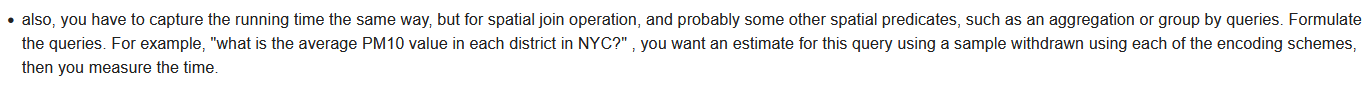





In [120]:
import numpy as np
from timeit import repeat as timeit_repeat
def group_neighborhood(sjoin):
    grouped_neighborhoods = sjoin.groupby('neighborhood', group_keys = False)['average_pm25_value'].mean() #should this be sum or mean? I'm not sure
    df_pm25_neighborhood = pd.DataFrame()
    df_pm25_neighborhood['average_pm25'] = grouped_neighborhoods
    df_pm25_neighborhood = df_pm25_neighborhood.reset_index()
    df_pm25_neighborhood["neighborhood"].astype(str)
    return df_pm25_neighborhood

In [121]:
print("Average of 5 runs for groupby query", np.mean(timeit_repeat(
        "group_neighborhood(sjoined_trips_original)",
        setup="from __main__ import group_neighborhood, sjoined_trips_original",
        repeat=5, number=1)), "seconds")

Average of 5 runs for groupby query 0.0019490599632263183 seconds


In [122]:
grouped_neighborhoods = sjoined_trips_original.groupby('neighborhood', group_keys = False)['average_pm25_value'].mean() #should this be sum or mean? I'm not sure
grouped_neighborhoods

neighborhood
Allerton                         3.183517
Baychester                       3.765326
Belmont                          4.115949
Bronx Park                       3.428038
Bronxdale                        3.795113
Castle Hill                      4.305137
Clason Point                     4.331581
Co-op City                       4.009176
Concourse                        2.890706
Concourse Village                3.288974
Country Club                     4.479957
Crotona Park                     4.580140
East Morrisania                  4.502457
Eastchester                      3.769726
Fieldston                        3.555394
Flushing Meadows Corona Park    10.021361
Fordham                          2.734712
Highbridge                       3.028341
Hunts Point                      4.447942
Inwood                           2.292276
Kingsbridge                      3.419940
Longwood                         4.314896
Marble Hill                      3.475927
Maspeth              

In [123]:
df_pm25_neighborhood = pd.DataFrame()
df_pm25_neighborhood['average_pm25'] = grouped_neighborhoods
df_pm25_neighborhood = df_pm25_neighborhood.reset_index()

In [124]:
df_pm25_neighborhood.head()

neighborhood  average_pm25
0     Allerton      3.183517
1   Baychester      3.765326
2      Belmont      4.115949
3   Bronx Park      3.428038
4    Bronxdale      3.795113

In [125]:
max(df_pm25_neighborhood['average_pm25'])

10.021361007993974

In [127]:
df_pm25_neighborhood["neighborhood"].astype(str)
geo_path = POLYGON_web_PATH
heatmap_scale = list()
threshold = [10,20,50,70,85,100]
for i in threshold :
    heatmap_scale.append(int(df_pm25_neighborhood['average_pm25'].max() * (i/100.0)))

df_pm25_neighborhoodx = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
folium.Choropleth(geo_data=geo_path, data=df_pm25_neighborhood, \
                data_out = 'nyc_zip_test.json',
             columns=['neighborhood', 'average_pm25'],
             #threshold_scale= heatmap_scale,
             key_on='feature.properties.neighborhood',
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.9,nan_fill_color='white',
             legend_name='Average PM25').add_to(df_pm25_neighborhoodx)

In [128]:
df_pm25_neighborhoodx

In [129]:
# %%time
# sampling by geohash
sampled_geohash_data = sampled_trips

In [130]:
def generateBaseMap(default_location=[40.7306, -73.935], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [131]:
sampled_h3_data_copy = sampled_geohash_data.sample(frac=1)
sampled_h3_data_copy['count'] = 1

In [132]:
base_map = generateBaseMap()

In [133]:
from folium.plugins import HeatMap
HeatMap(data=sampled_h3_data_copy[['latitude', 'longitude', 'pm25']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [134]:
base_map